In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
dataset = pd.read_csv(url, names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class'])

In [4]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

#or 
#x = dataset.drop("class",axis=1)
#y = dataset["class"]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
X_train

array([[-1.13288393, -1.30981399,  0.44173437,  0.68119413],
       [ 1.16105511,  0.3372575 ,  1.23459093,  1.46971467],
       [ 1.16105511, -0.13333436,  1.00806048,  1.20687449],
       [ 0.55738694, -1.78040585,  0.38510176,  0.15551377],
       [-0.40848213, -1.07451807,  0.38510176,  0.02409368],
       [-0.40848213,  2.69021676, -1.31387658, -1.29010722],
       [ 0.07445241,  0.3372575 ,  0.6116322 ,  0.81261422],
       [-1.25361756, -0.13333436, -1.31387658, -1.42152731],
       [-0.04628123, -0.83922214,  0.78153004,  0.94403431],
       [ 1.04032147,  0.57255342,  1.1213257 ,  1.73255485],
       [ 1.04032147, -1.30981399,  1.17795832,  0.81261422],
       [ 1.76472327, -0.36863029,  1.46112137,  0.81261422],
       [-1.13288393, -1.54510992, -0.23785697, -0.2387465 ],
       [-1.13288393, -0.13333436, -1.31387658, -1.29010722],
       [ 0.55738694, -0.83922214,  0.66826481,  0.81261422],
       [ 0.67812057,  0.10196157,  1.00806048,  0.81261422],
       [-0.89141666,  1.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred)*100)

[[ 9  0  0]
 [ 0  7  1]
 [ 0  1 12]]
93.33333333333333


In [12]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [13]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

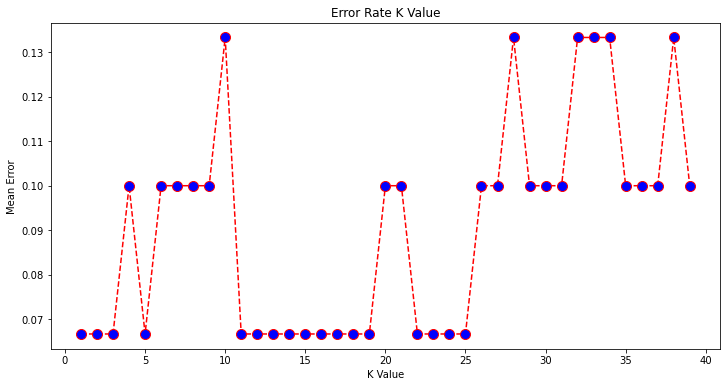

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')